# Tirada de moneda

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.randint(2) # tiro la moneda una vez

1

In [3]:
np.random.randint(2,size = 10) # 10 tiradas de moneda

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

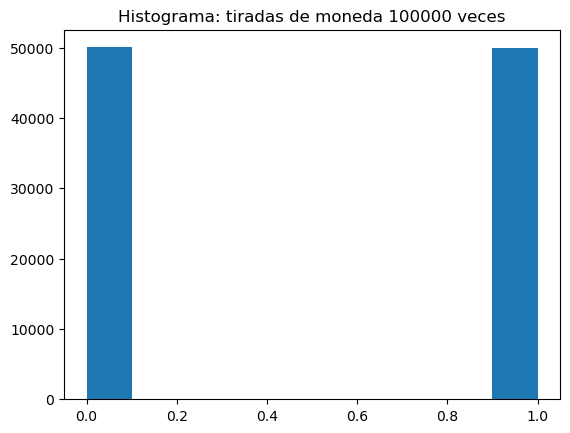

In [9]:
size = 100000
results = np.random.randint(2,size = size)
fig,ax = plt.subplots() 
ax.set_title(f"Histograma: tiradas de moneda {size} veces")
ax.hist(results)
plt.show()

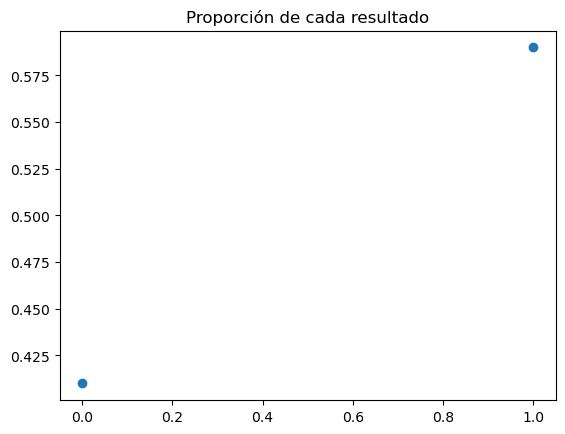

In [30]:
#grafica el porcentaje de cada resultado unico
size = 100
results = np.random.randint(2,size = size)
x = np.unique(results)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = sum(results == x[i])
y = y/len(results)
plt.title("Proporción de cada resultado")
plt.scatter(x, y)

In [35]:
def aproximar_pmf(results):
    size = len(results)
    x = np.unique(results)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = sum(results == x[i])
    y = y/size
    # Ploteo
    fig,ax = plt.subplots() 
    ax.scatter(x,y)
    ax.set_ylim(0,1)
    ax.set_title(f"Aproximación de la pmf (funcion de probabilidad puntual) con {size} samples")
    plt.show()

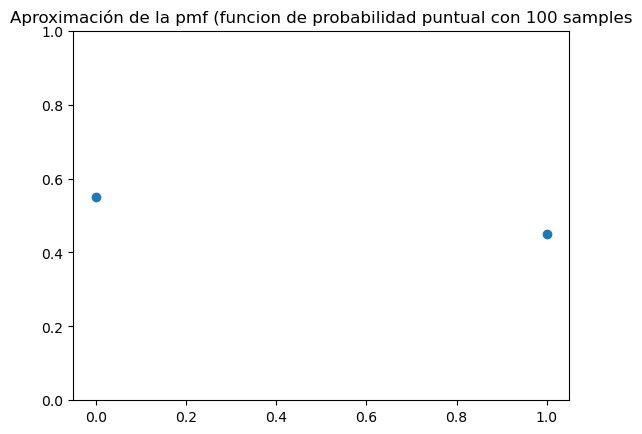

In [39]:
samples = np.random.randint(2,size = 100)
aproximar_pmf(samples)

# Binomial

In [40]:
n = 3
p = .1
size = 10
samples = np.random.binomial(n, p, size)
print(samples)


[0 1 0 1 0 0 0 0 0 0]


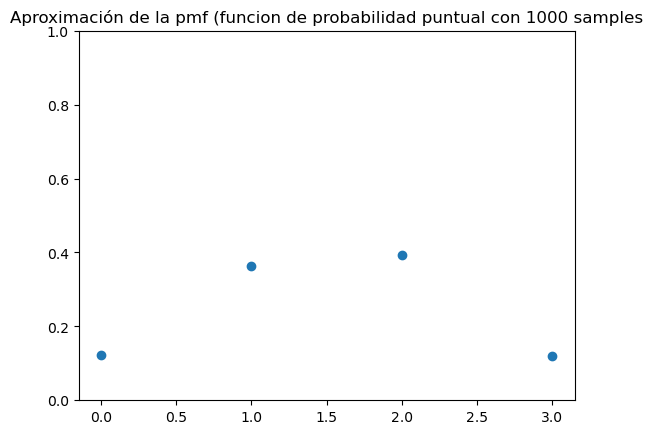

In [41]:
n, p, size = 3, .5, 1_000
samples =  np.random.binomial(n, p, size)
aproximar_pmf(samples)

In [42]:
from scipy.stats import binom
n, p = 3, 0.5
binomial = binom(n,p) # qué es esto?

In [43]:
binomial

In [44]:
binomial.pmf(3)

0.125

[0 1 2 3]


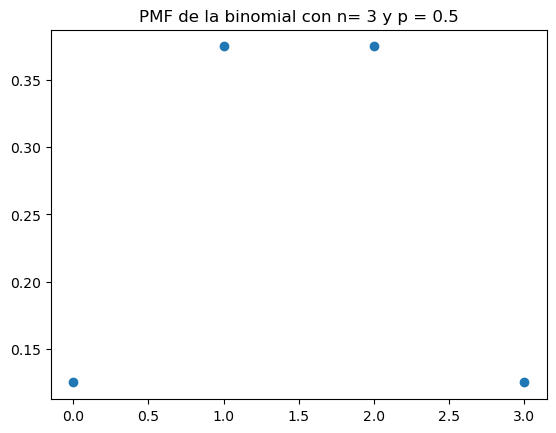

In [45]:
x = np.arange(4)
print(x)
plt.title(f"PMF de la binomial con n= {n} y p = {p}")
plt.scatter(x,binomial.pmf(x))
plt.show()

# Suma de Bernoullis

In [46]:
p = .5
binom(1,p).rvs([3,12]) # tirar una moneda

array([[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [47]:
N = 3 # N monedas
size = 10 # Cantidad de tiradas
p = .5 # la probabilidad de que salga cara 
threesample = binom(1,p).rvs([N,size])
print(threesample)


[[0 0 0 0 1 1 0 1 0 0]
 [1 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 1 1 0 1 1]]


In [48]:
sample = np.sum(threesample,axis = 0)
sample

array([1, 0, 0, 1, 1, 2, 2, 1, 2, 1], dtype=int64)

[1 3 2 ... 1 2 2]


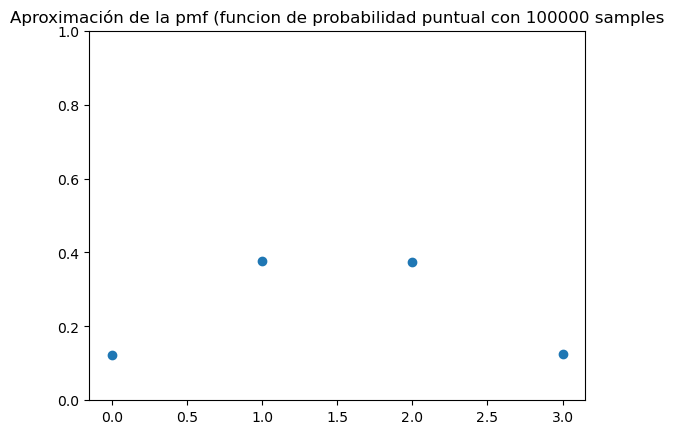

In [51]:
size = 1_00000
threesample = binom(1,p).rvs([N,size])
sample = np.sum(threesample,axis = 0)
print(sample)
aproximar_pmf(sample)